# MinMax Scaling

### 1. 데이터 불러오기

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/최종500m격자_2.csv', encoding = 'cp949')
df.head(2)

,gid,거주인구,고령인구,유아인구,동,수급자밀도,생활인구밀도,구,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,RN,재비산먼지평균,초미세먼지평균
0,다사58a48a,6141,1265,317,압구정동,60.079,17568.666,강남구,186.227848,1.0,-0.342724,27.323896,올림픽대로,7.571,18.953644
1,다사58b48a,3577,716,154,압구정동,60.079,17568.666,강남구,186.227848,0.0,-0.272901,27.347040,올림픽대로,7.571,18.805771


In [5]:
df.rename(columns={'재비산먼지평균':"재비산먼지평균농도", "초미세먼지평균":"초미세먼지평균농도"}, inplace = True)
df.head(2)

,gid,거주인구,고령인구,유아인구,동,수급자밀도,생활인구밀도,구,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,RN,재비산먼지평균농도,초미세먼지평균농도
0,다사58a48a,6141,1265,317,압구정동,60.079,17568.666,강남구,186.227848,1.0,-0.342724,27.323896,올림픽대로,7.571,18.953644
1,다사58b48a,3577,716,154,압구정동,60.079,17568.666,강남구,186.227848,0.0,-0.272901,27.347040,올림픽대로,7.571,18.805771


In [6]:
cols = df.columns.tolist()
print(cols)

['gid', '거주인구', '고령인구', '유아인구', '동', '수급자밀도', '생활인구밀도', '구', '범죄밀도', '유흥업소개수', '최한월평균기온', '최난월평균기온', 'RN', '재비산먼지평균농도', '초미세먼지평균농도']


In [7]:
df = df[['gid', '구', '동', 'RN', '거주인구', '유아인구', '고령인구', '수급자밀도', '생활인구밀도', '범죄밀도', '유흥업소개수', '최한월평균기온', '최난월평균기온', '초미세먼지평균농도', '재비산먼지평균농도']]
df.head(2)

,gid,구,동,RN,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
0,다사58a48a,강남구,압구정동,올림픽대로,6141,317,1265,60.079,17568.666,186.227848,1.0,-0.342724,27.323896,18.953644,7.571
1,다사58b48a,강남구,압구정동,올림픽대로,3577,154,716,60.079,17568.666,186.227848,0.0,-0.272901,27.347040,18.805771,7.571


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gid        2634 non-null   object 
 1   구          2634 non-null   object 
 2   동          2634 non-null   object 
 3   RN         2395 non-null   object 
 4   거주인구       2634 non-null   int64  
 5   유아인구       2634 non-null   int64  
 6   고령인구       2634 non-null   int64  
 7   수급자밀도      2634 non-null   float64
 8   생활인구밀도     2634 non-null   float64
 9   범죄밀도       2634 non-null   float64
 10  유흥업소개수     2634 non-null   float64
 11  최한월평균기온    2634 non-null   float64
 12  최난월평균기온    2634 non-null   float64
 13  초미세먼지평균농도  2634 non-null   float64
 14  재비산먼지평균농도  2634 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 308.8+ KB


In [9]:
df.isnull().sum()

gid            0
구              0
동              0
RN           239
거주인구           0
유아인구           0
고령인구           0
수급자밀도          0
생활인구밀도         0
범죄밀도           0
유흥업소개수         0
최한월평균기온        0
최난월평균기온        0
초미세먼지평균농도      0
재비산먼지평균농도      0
dtype: int64

In [10]:
df.describe()

,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000
mean,3586.715262,137.819286,659.638193,643.965980,16637.320247,152.872177,5.047077,-0.458854,27.106366,18.817288,16.128379
std,3676.957052,167.236612,696.992654,715.605725,11157.947621,47.455886,10.000991,0.541893,0.371835,1.144848,19.524162
min,0.000000,0.000000,0.000000,1.087000,1801.216000,97.935292,0.000000,-3.017495,24.841394,14.091853,0.000000
25%,0.000000,0.000000,0.000000,141.496000,6924.740000,106.513872,0.000000,-0.754586,26.924212,18.171774,7.571000
50%,2469.000000,80.000000,436.500000,386.916000,14700.128000,154.046360,0.000000,-0.401251,27.139386,18.684283,7.571000
75%,6624.500000,225.000000,1169.750000,951.462000,24514.151000,186.227848,6.000000,-0.103881,27.360371,19.506471,20.107250
max,18402.000000,1343.000000,3443.000000,6970.886000,53215.288000,342.469879,117.000000,2.853422,28.495331,31.382101,202.571000


### 2. scaling

In [11]:
df_scaled = df.copy()
df_scaled.set_index('gid', inplace=True)
df_scaled.head(2)

,구,동,RN,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
gid,,,,,,,,,,,,,,
다사58a48a,강남구,압구정동,올림픽대로,6141,317,1265,60.079,17568.666,186.227848,1.0,-0.342724,27.323896,18.953644,7.571
다사58b48a,강남구,압구정동,올림픽대로,3577,154,716,60.079,17568.666,186.227848,0.0,-0.272901,27.347040,18.805771,7.571


In [12]:
#스케일링 대상 칼럼 정리
df_num_cols = ['거주인구', '유아인구', '고령인구', '수급자밀도', '생활인구밀도', '범죄밀도', 
               '유흥업소개수', '최난월평균기온', '초미세먼지평균농도', '재비산먼지평균농도']
df_neg_cols = ['최한월평균기온']

In [13]:
#일반 칼럼 스케일링
scaler = MinMaxScaler()

df_scaled[df_num_cols] = scaler.fit_transform(df_scaled.loc[:,df_num_cols])
df_scaled.head(2)

,구,동,RN,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
gid,,,,,,,,,,,,,,
다사58a48a,강남구,압구정동,올림픽대로,0.333714,0.236039,0.367412,0.008464,0.306676,0.361064,0.008547,-0.342724,0.679405,0.281187,0.037375
다사58b48a,강남구,압구정동,올림픽대로,0.194381,0.114669,0.207958,0.008464,0.306676,0.361064,0.000000,-0.272901,0.685739,0.272634,0.037375


In [14]:
#음수 칼럼 스케일링
#음수 계산을 위해 최댓값을 0으로 맞추기
df_scaled['최한월평균기온'] = df_scaled['최한월평균기온'] - df_scaled['최한월평균기온'].max()
df_scaled['최한월평균기온'].describe()

count    2634.000000
mean       -3.312276
std         0.541893
min        -5.870917
25%        -3.608008
50%        -3.254673
75%        -2.957303
max         0.000000
Name: 최한월평균기온, dtype: float64

최한월평균기온 열의 경우 음수값이 포함되어 있으므로 다른 기준 적용 필요  
평균기온이 가장 낮은 지역에 가장 높은 점수를 부여하기 위해서 (-1,0) 범위로 스케일링 후  
-1을 곱하여 부호 반전하는 방법으로 정리

In [15]:
scaler = MinMaxScaler(feature_range = (-1,0))

df_scaled[df_neg_cols] = scaler.fit_transform(df_scaled.loc[:,df_neg_cols])
df_scaled[df_neg_cols] = df_scaled[df_neg_cols] * -1 #부호반전

df_scaled.head(2)

,구,동,RN,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
gid,,,,,,,,,,,,,,
다사58a48a,강남구,압구정동,올림픽대로,0.333714,0.236039,0.367412,0.008464,0.306676,0.361064,0.008547,0.544403,0.679405,0.281187,0.037375
다사58b48a,강남구,압구정동,올림픽대로,0.194381,0.114669,0.207958,0.008464,0.306676,0.361064,0.000000,0.532510,0.685739,0.272634,0.037375


In [16]:
df_scaled.reset_index(inplace=True)
df_scaled.describe()

,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000
mean,0.194909,0.102620,0.191588,0.092238,0.288561,0.224659,0.043137,0.564184,0.619872,0.273301,0.079618
std,0.199813,0.124525,0.202438,0.102672,0.217021,0.194066,0.085479,0.092301,0.101763,0.066214,0.096382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.020145,0.099652,0.035081,0.000000,0.503721,0.570020,0.235967,0.037375
50%,0.134170,0.059568,0.126779,0.055357,0.250883,0.229461,0.000000,0.554372,0.628909,0.265608,0.037375
75%,0.359988,0.167535,0.339747,0.136356,0.441765,0.361064,0.051282,0.614556,0.689387,0.313160,0.099260
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
index = df_scaled[df_scaled['최한월평균기온'] == 0].index
df_scaled.loc[index, '최한월평균기온'] = 0

In [18]:
#확인
df_scaled.describe()

,거주인구,유아인구,고령인구,수급자밀도,생활인구밀도,범죄밀도,유흥업소개수,최한월평균기온,최난월평균기온,초미세먼지평균농도,재비산먼지평균농도
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000
mean,0.194909,0.102620,0.191588,0.092238,0.288561,0.224659,0.043137,0.564184,0.619872,0.273301,0.079618
std,0.199813,0.124525,0.202438,0.102672,0.217021,0.194066,0.085479,0.092301,0.101763,0.066214,0.096382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.020145,0.099652,0.035081,0.000000,0.503721,0.570020,0.235967,0.037375
50%,0.134170,0.059568,0.126779,0.055357,0.250883,0.229461,0.000000,0.554372,0.628909,0.265608,0.037375
75%,0.359988,0.167535,0.339747,0.136356,0.441765,0.361064,0.051282,0.614556,0.689387,0.313160,0.099260
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_scaled.to_csv('./output/격자minmax_최종.csv', encoding = 'cp949', index = False)

### 2-1. 포인트데이터 scaling

In [36]:
df_point = pd.read_csv('./data/bus/정류장별 승하차 인원 일평균.csv', encoding = 'cp949')
df_point.head()

,ARS-ID,승차총승객수,하차총승객수,승하차평균,정류소명,좌표X,좌표Y
0,1001,397.084932,350.986301,748.071233,종로2가사거리,126.987786,37.569764
1,1002,1903.449315,1729.282192,3632.731507,창경궁.서울대학교병원,126.996520,37.579179
2,1003,2697.164384,2145.528767,4842.693151,명륜3가.성대입구,126.998290,37.582709
3,1004,527.005479,568.200000,1095.205479,종로2가.삼일교,126.987507,37.568582
4,1005,1275.797260,1994.101370,3269.898630,혜화동로터리.여운형활동터,127.001694,37.586230


In [39]:
df_point = df_point[['ARS-ID', '정류소명', '좌표X', '좌표Y', '승하차평균']]
df_point.describe()

,ARS-ID,좌표X,좌표Y,승하차평균
count,10578.000000,10578.000000,10578.000000,10578.000000
mean,14203.613632,126.985456,37.551208,688.244840
std,6870.849588,0.085406,0.055251,1056.054959
min,1001.000000,126.798353,37.430780,0.213699
25%,8597.250000,126.916987,37.502661,121.452740
50%,14332.500000,126.993604,37.550755,322.347945
75%,20242.750000,127.050397,37.592192,805.293836
max,25990.000000,127.181557,37.690199,15011.950685


In [40]:
df_point.set_index(['ARS-ID', '정류소명', '좌표X', '좌표Y'], inplace=True)

In [44]:
df_point_scaled = df_point.copy()
point_col = ['승하차평균']

In [45]:
#일반 칼럼 스케일링
scaler = MinMaxScaler()

df_point_scaled[point_col] = scaler.fit_transform(df_point_scaled.loc[:,point_col])
df_point_scaled.head(2)

,,,,승하차평균
ARS-ID,정류소명,좌표X,좌표Y,
1001,종로2가사거리,126.987786,37.569764,0.049818
1002,창경궁.서울대학교병원,126.996520,37.579179,0.241979


In [46]:
df_point_scaled.describe()

,승하차평균
count,10578.000000
mean,0.045833
std,0.070349
min,0.000000
25%,0.008076
50%,0.021459
75%,0.053630
max,1.000000


In [49]:
df_point_scaled.reset_index(inplace=True)

In [51]:
df_point_scaled.to_csv('./output/포인트minmax.csv', encoding = 'cp949', index = False)

### 3. 결과 시각화

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt': font_family = 'Malgun Gothic'
else: font_family = 'AppleGothic'
    
sns.set(font=font_family, rc={'axes.unicode_minus':False})

Text(0.5, 1.0, '원본')

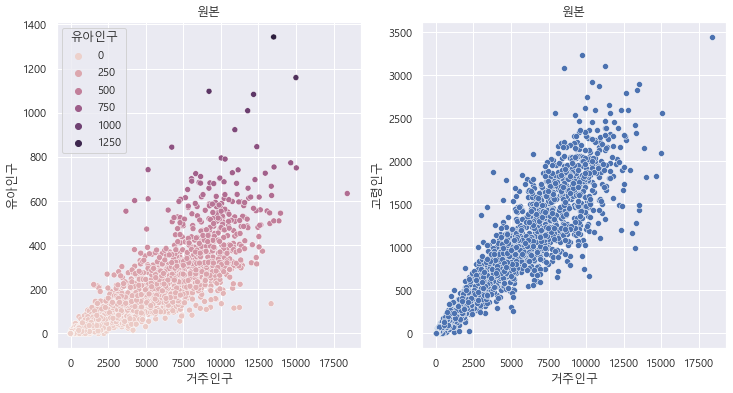

In [31]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.scatterplot(x = '거주인구',y = '유아인구', hue = '유아인구', data = df)
plt.title("원본")

plt.subplot(1,2,2)
sns.scatterplot(x = '거주인구',y = '고령인구', data = df)
plt.title("원본")

Text(0.5, 1.0, '원본x')

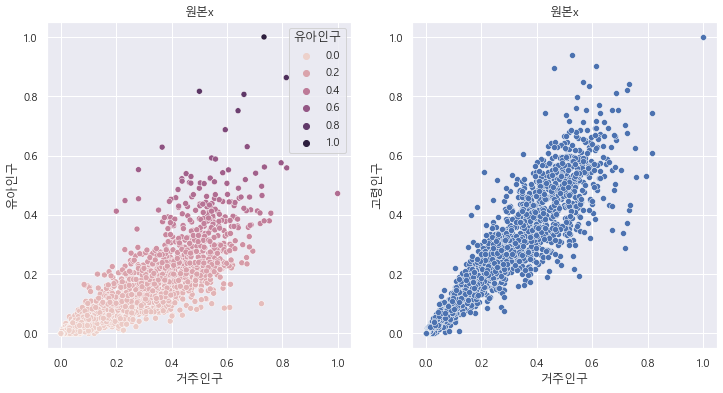

In [33]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.scatterplot(x = '거주인구',y = '유아인구', hue = '유아인구', data = df_scaled)
plt.title("원본x")

plt.subplot(1,2,2)
sns.scatterplot(x = '거주인구',y = '고령인구', data = df_scaled)
plt.title("원본x")